In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
# Fetch historical stock data for Apple
def load_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

# Define date range (last 2 years up to current date)
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=730)).strftime('%Y-%m-%d')

# Load data
df = load_stock_data('AAPL', start_date, end_date)

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Create lagged features (previous day's data to predict next day's close)
df['Next_Close'] = df['Close'].shift(-1)
df = df.dropna()  # Remove rows with NaN (last row)

# Split features and target
X = df[features]
y = df['Next_Close']

Dataset Info:
             Open        High         Low        Volume  Next_Close
count  500.000000  500.000000  500.000000  5.000000e+02  500.000000
mean   203.356637  205.448931  201.454310  5.684382e+07  203.589634
std     23.901945   24.148120   23.618412  2.628913e+07   23.966973
min    164.357373  165.401081  163.095016  2.323470e+07  164.009491
25%    182.341255  183.909316  180.245951  4.297288e+07  182.258854
50%    201.612824  203.790001  199.799995  5.117375e+07  201.529999
75%    224.156381  226.052740  222.227656  6.192812e+07  224.086586
max    257.568678  259.474086  257.010028  3.186799e+08  258.396667


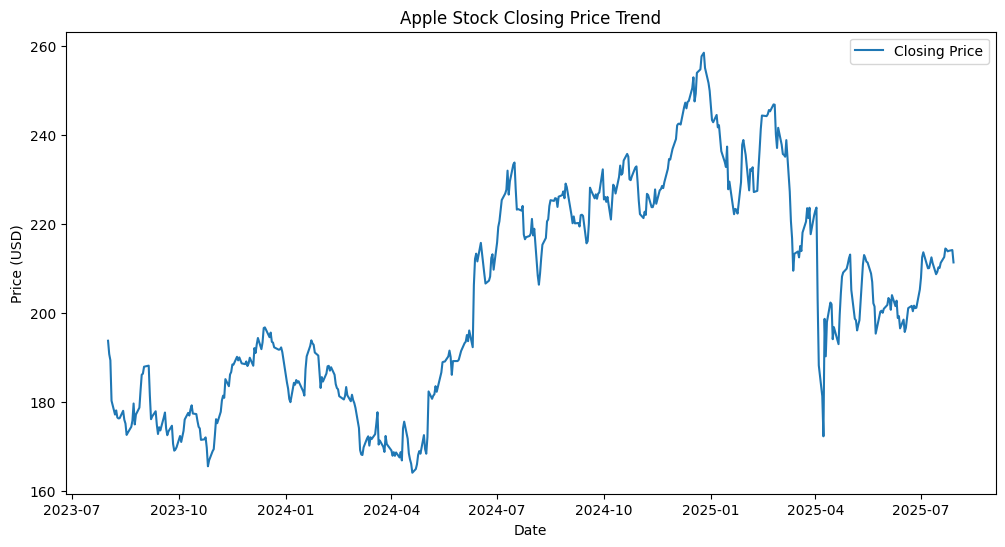

In [ ]:
# Basic statistics
print("Dataset Info:")
print(df[features + ['Next_Close']].describe())

# Visualize closing price trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Apple Stock Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Split data (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 400
Testing samples: 100


In [ ]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Training RMSE: 3.03
Testing RMSE: 5.48
Training R²: 0.9866
Testing R²: 0.6856


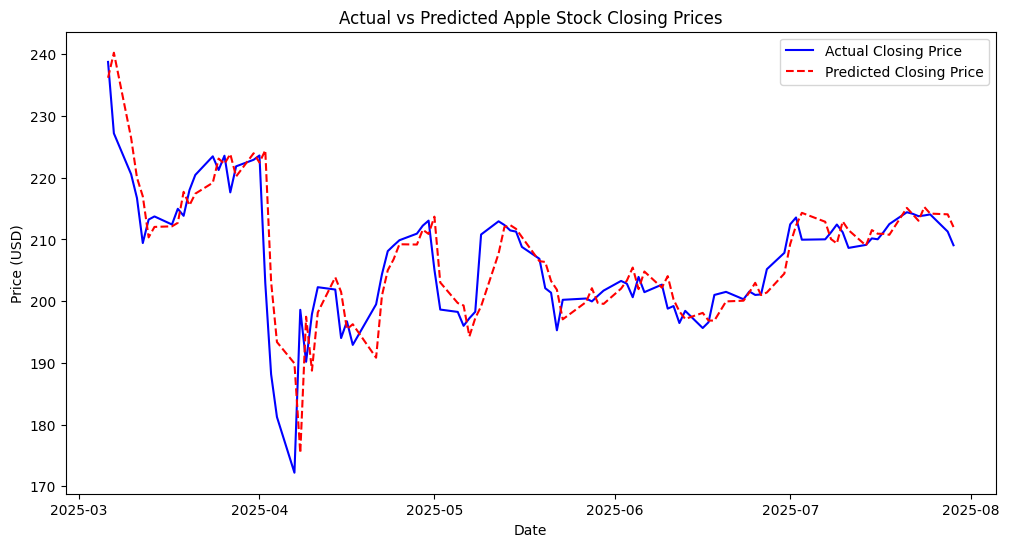

In [ ]:
# Plot actual vs predicted for test set
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='blue')
plt.plot(y_test.index, y_pred_test, label='Predicted Closing Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
# Display feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Feature Importance:
  Feature   Coefficient
1    High  9.409659e-01
2     Low  7.945543e-01
3  Volume -9.579318e-09
0    Open -7.409316e-01


In [ ]:
# Get the most recent data point for prediction
latest_data = df[features].iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(latest_data)[0]
print(f"\nPredicted closing price for the next trading day: ${next_day_prediction:.2f}")


Predicted closing price for the next trading day: $212.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
